# Elections Ad Spending Analysis in Argentina using Python(2023)

#### We collected data from Google ads about how much money was spent in formats like text, videos or image by political parties during Argentina elections 2023. In this article, we perform elections ad spending analysis - EDA - using Python (and how it impacted the voting patterns).

## Data Collection

We extract the dataset from Ads Transparency Center which format is in Google Sheet. We transform this and download it in a .csv format. 

We import the library pandas for dataframe manipulation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor


In [2]:
df_ads = pd.read_csv("/home/andy/Descargas/ds_googleads.csv") #cambiar esto, quiero que me aparezca
                                                                #sólo el nombre de la carpeta
print("Shape of dataset: ", df_ads.shape)


Shape of dataset:  (5813, 22)


In [ ]:
# Let's see the column names
df_ads.keys()

In [ ]:
# Let's check it out, for example, the first URL 
df_ads['Ad_URL'][0]

In [ ]:
len(df_ads['Advertiser_ID'].unique())

In [ ]:
fr = 'AR14823408713892626433'
df_ads[df_ads['Advertiser_ID'] == fr]

In [ ]:
gc = 'AR17825122736721100801'
df_ads[df_ads['Advertiser_ID'] == gc]                                                                                                                                                                                                                                                                                                       q

In [ ]:
df_ads.drop(['Ad_ID'],axis=1)

In [ ]:
#show the first 5 rows
df_ads.head()

#levantar datos datetime,
#pd.to_datetime()

### Data Cleaning & Data Preprocessing

In [ ]:
#Let's drop NaN values from the dataframe like 
#Ad_Campaigns_List, Age_Trageting, Gender_Targeting,  Geo_Targeting_Excluded.

display(type(df_ads))  # This should print <class 'pandas.core.frame.DataFrame'>
display(df_ads.head())  # Print the first few rows to ensure it's a valid DataFrame

In [ ]:
# Let's see summary statistics of relevant columns, for example: Spend_Range_Max_ARS:
print(df_ads['Spend_Range_Max_ARS'])

In [ ]:
# We convert the data type:'Spend_Range_Max_ARS'  to float
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].astype(float)

# Display the updated data types
print(df_ads.dtypes)


Given that the inner elements from column 'Spend_Range_Max_AR' has a typing error(?), we fix it in the following way: 

In [ ]:
# Remove the thousand separator and replace the decimal separator
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

# Convert the column to float
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].astype(float)

# Display the updated DataFrame and data types
display(df_ads)
display(df_ads.dtypes)


In [10]:
# 
display(df_ads['Spend_Range_Max_ARS'].describe())

count          5813
unique           24
top       15.000,00
freq           4730
Name: Spend_Range_Max_ARS, dtype: object

In [ ]:
df_ads['Spend_Range_Max_ARS'].hist(bins=100)

plt.xlim(0, 100000)

In [11]:
#We calculate the mode (most frequent value) of the column 'Spend_Range_Max_ARS':
df_ads['Spend_Range_Max_ARS'].value_counts()

Spend_Range_Max_ARS
15.000,00       4730
30.000,00        400
45.000,00        166
60.000,00        112
75.000,00         82
200.000,00        43
250.000,00        39
120.000,00        38
90.000,00         35
105.000,00        33
135.000,00        29
150.000,00        21
350.000,00        17
300.000,00        14
450.000,00         9
400.000,00         9
700.000,00         8
500.000,00         6
900.000,00         6
600.000,00         5
1.500.000,00       4
800.000,00         3
3.000.000,00       2
1.000.000,00       2
Name: count, dtype: int64

### Ad Spend Analysis

In [3]:
# Get unique ID types
unique_ids = df_ads['Ad_ID'].unique()
display("Unique Ad ID:", unique_ids)

'Unique Ad ID:'

array(['CR10079170796300795905', 'CR07383048713104523265',
       'CR08190079252775829505', ..., 'CR14634596316563374081',
       'CR03606406729039872001', 'CR12197502405318803457'], dtype=object)

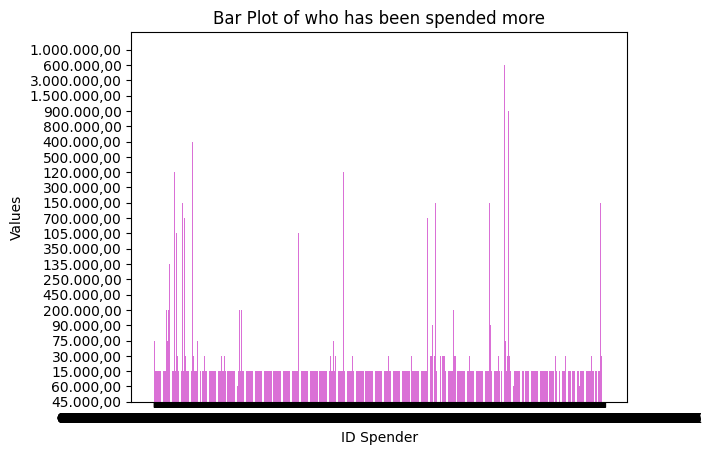

In [9]:
# Extracting the columns
x = unique_ids
y = df_ads['Spend_Range_Max_ARS'] 

# Plotting the bar chart
plt.bar(x, y, color='orchid')  

# Customizing the plot
plt.xlabel('ID Spender')
plt.ylabel('Values')
plt.title('Bar Plot of who has been spended more')

# Step 5: Show the plot
plt.show()
